In [67]:
import tensorflow as tf
import os.path
import cv2
import matplotlib.pyplot as plt
import numpy as np
import cv2
import imghdr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [68]:
data_dir = r"C:\Users\Vinnie\Documents\BrainCancerCNN"

In [69]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [70]:
os.listdir(r"C:\Users\Vinnie\Documents\BrainCancerCNN")

['Brain Cancer', 'Normal Brain']

In [71]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [72]:
#Remove Dodgy Images
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [74]:
Data = tf.keras.utils.image_dataset_from_directory(r"C:\Users\Vinnie\Documents\BrainCancerCNN")

Found 536 files belonging to 2 classes.


In [75]:
Data_iterator = Data.as_numpy_iterator()

In [76]:
batch = Data_iterator.next()

In [77]:
len(batch)

2

In [78]:
batch[0].shape

(32, 256, 256, 3)

In [79]:
batch[1]

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1])

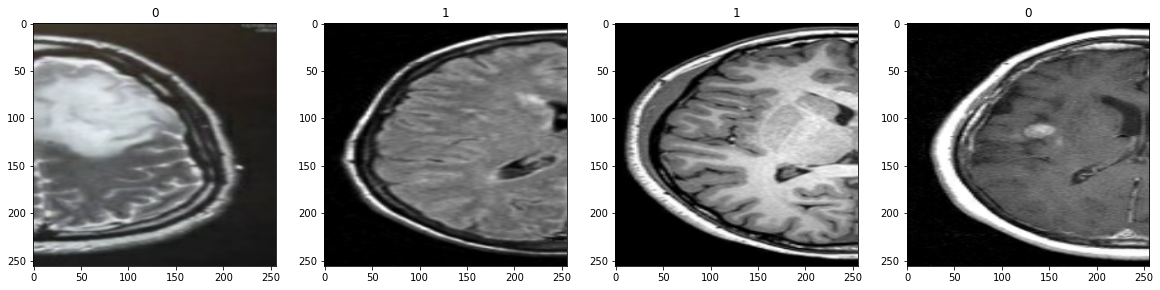

In [80]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [81]:
scaled = batch[0] / 255

In [82]:
scaled.max()

1.0

In [83]:
Data = Data.map(lambda x,y: (x/255, y))

In [84]:
scaled_iterator = Data.as_numpy_iterator()

In [85]:
batch = scaled_iterator.next()

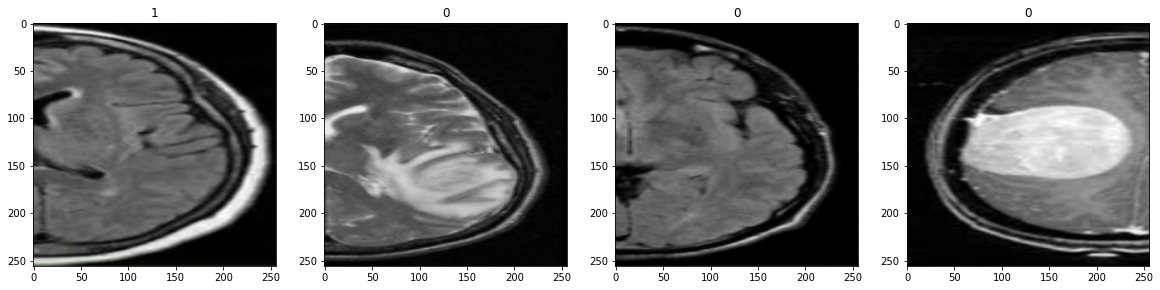

In [86]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [87]:
len(Data)

17

In [88]:
train_size = int(len(Data)*.7)
val_size = int(len(Data)*.2)
test_size = int(len(Data)*.1)

In [89]:
train_size

11

In [90]:
val_size

3

In [91]:
test_size

1

In [92]:
train = Data.take(train_size)
val = Data.skip(train_size).take(val_size)
test = Data.skip(train_size+val_size).take(test_size)

In [93]:
model = Sequential()

In [94]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [95]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [96]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [97]:
logdir='logs'

In [98]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [99]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
11/11 [==============================] - 8s 601ms/step - loss: 0.8370 - accuracy: 0.4972 - val_loss: 0.6918 - val_accuracy: 0.5417
Epoch 2/20
11/11 [==============================] - 7s 591ms/step - loss: 0.6918 - accuracy: 0.5227 - val_loss: 0.6866 - val_accuracy: 0.5521
Epoch 3/20
11/11 [==============================] - 7s 586ms/step - loss: 0.6680 - accuracy: 0.6364 - val_loss: 0.6211 - val_accuracy: 0.6146
Epoch 4/20
11/11 [==============================] - 7s 581ms/step - loss: 0.5926 - accuracy: 0.6761 - val_loss: 0.5068 - val_accuracy: 0.7604
Epoch 5/20
11/11 [==============================] - 7s 583ms/step - loss: 0.4763 - accuracy: 0.7557 - val_loss: 0.3670 - val_accuracy: 0.8646
Epoch 6/20
11/11 [==============================] - 7s 587ms/step - loss: 0.3447 - accuracy: 0.8636 - val_loss: 0.4152 - val_accuracy: 0.8333
Epoch 7/20
11/11 [==============================] - 7s 598ms/step - loss: 0.2744 - accuracy: 0.9119 - val_loss: 0.2507 - val_accuracy: 0.9271
Epoch 

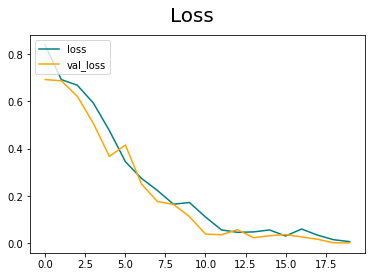

In [100]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

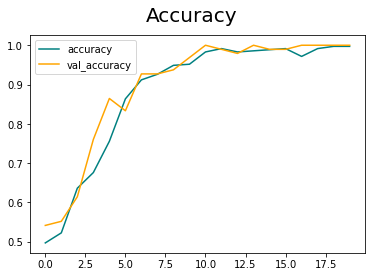

In [101]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [102]:
hist1 = model.fit(test, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 2/20
1/1 [==============================] - 1s 1s/step - loss: 7.4555e-04 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 1s 1s/step - loss: 8.5916e-04 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 1s 1s/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 1s 1s/step - loss: 0.3913 - accuracy: 0.9688 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 1s 1s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0686 - val_accuracy: 0.9896
Epoch 7/20
1/1 [==============================] - 1s 1s/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 8/20
1/1 [=================

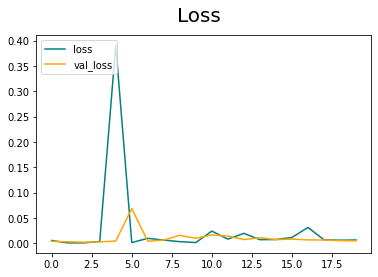

In [103]:
fig = plt.figure()
plt.plot(hist1.history['loss'], color='teal', label='loss')
plt.plot(hist1.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

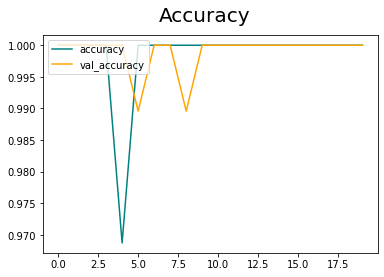

In [104]:

fig = plt.figure()
plt.plot(hist1.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist1.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [105]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [106]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [107]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 147ms/step


In [108]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [109]:
len(test)

1

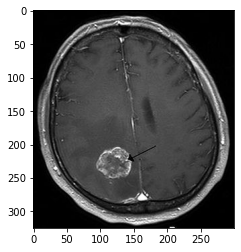

In [110]:
img = cv2.imread(r"C:\Users\Vinnie\Documents\BrainCancerCNN\BRAINCANCERTEST.jpg")
plt.imshow(img)
plt.show()

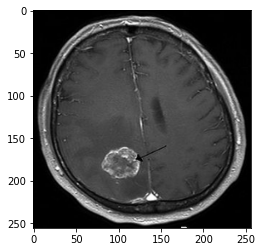

In [111]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [113]:
Brain_cancer_Test = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 68ms/step


In [115]:
if Brain_cancer_Test > 0.5: 
    print(f'Predicted class is Normal')
else:
    print(f'Predicted class is Brain cancer')

Predicted class is Brain cancer


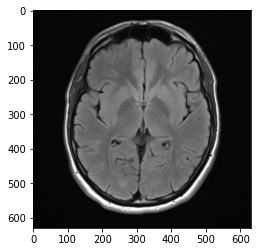

In [116]:
img = cv2.imread(r"C:\Users\Vinnie\Documents\BrainCancerCNN\NORMALBRAINTEST.jpeg")
plt.imshow(img)
plt.show()

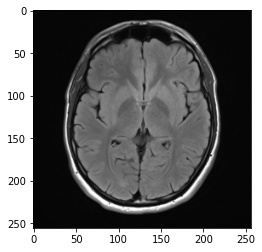

In [117]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [118]:
Normal_Test = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 26ms/step


In [121]:
if Normal_Test > 0.5: 
    print(f'Predicted class is Brain cancer')
else:
    print(f'Predicted class is Normal')

Predicted class is Normal
